In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [72]:
path = "./data/survey_responses.csv"
responses = pd.read_csv(path) #dtype={"birthyear": np.int16, "pageviews": np.int32})
n_intervieews = len(responses)
responses.head(3)

,Timestamp,Name,Affiliation,Country,Years of experience with learning science?,More details about type of LS expertise,Student 1 (slightly different explanations): General Perceptions,Student 1: Which TA do you trust?,Student 1: Why?,Student 1: How do you decide which indicators to use for intervention?,...,"You're a principal of a school. For designing policy decisions over many classrooms for over 200 students, what are your most important explainability needs? [Actionable [designing an intervention]]","You're a principal of a school. For designing policy decisions over many classrooms for over 200 students, what are your most important explainability needs? [Human Interpretable [easy for a non-data scientist to understand]]",Notes (full course),Student 1: intervention,Student 2: intervention,Student 3: intervention,Student 3: intervention.1,Student 1: intervention features,Student 2: intervention features,Student 3: intervention features
0,8/16/2023 17:23:07,Kate Kutsenok,EPFL,Switzerland,1,"PhD in LS, courses in LS theory and methods",Believable,TA 2,The arguments of the first TA were not argumen...,Trust more the second TA for their quantifying...,...,5 (most important),5 (most important),NaN,"TA 2, Reason 2",NaN,NaN,NaN,"Model 2, Feature 2",NaN,"Model 1, Feature 1, Model 1, Feature 2"
1,8/17/2023 4:02:23,Juliette Parchet,EPFL/HEP,Swizerland,1,small teaching experience,Believable,Both,"don't contradict, complement each others",broader view than TA 1,...,5 (most important),4,human interpretable important to explain decis...,"TA 2, Reason 1, TA 2, Reason 2","TA 2, Reason 1, TA 2, Reason 2",NaN,"TA 2, Reason 1, TA 2, Reason 2","Model 1, Feature 1, Model 2, Feature 1","Model 2, Feature 1, Model 2, Feature 2","Model 2, Feature 1, Model 2, Feature 2"
2,8/17/2023 6:48:15,Jibril Frej,EPFL,Switzerland,1,Postdoc in a lab affiliated with learning scie...,Believable,Both,Different but both valid perspective,arguments make sense for the conclusion of bot...,...,5 (most important),5 (most important),Highest accuracy: impact a lot of people. High...,"TA 1, Reason 1, TA 1, Reason 2, TA 2, Reason 1...","TA 2, Reason 1, TA 2, Reason 2",NaN,"TA 1, Reason 1, TA 1, Reason 2, TA 2, Reason 1...","Model 1, Feature 1, Model 2, Feature 1","Model 1, Feature 2, Model 2, Feature 1","Model 2, Feature 1, Model 2, Feature 2"


In [4]:
headers = list(responses.columns)
headers_demographics = headers[:6]
headers_TAs = headers[6:18] + headers[49:51] + headers[52:53]
headers_models = headers[18:30] + headers[53:56]
headers_TA_vs_model = headers[30:31]
headers_explainability_needs = headers[31:49]
headers_explainability_needs_tutor = headers[31:37] # !!! Principal should come first, but first is tutor !!!
headers_explainability_needs_teacher = headers[37:43] 
headers_explainability_needs_principal = headers[43:49] 
headers

['Timestamp',
 'Name',
 'Affiliation',
 'Country',
 'Years of experience with learning science?',
 'More details about type of LS expertise',
 'Student 1 (slightly different explanations): General Perceptions',
 'Student 1: Which TA do you trust?',
 'Student 1: Why?',
 'Student 1: How do you decide which indicators to use for intervention?',
 'Student 2 (different explanations): General Perceptions',
 'Student 2: Which TA do you trust?',
 'Student 2: Why?',
 'Student 2: How do you decide which indicators to use for intervention?',
 'Student 3 (different predictions + explanations): General Perceptions',
 'Student 3: Which TA do you trust?',
 'Student 3: Why?',
 'Student 3: How do you decide which indicators to use for intervention?',
 'Student 1 (slightly different explanations): General Perceptions.1',
 'Student 1: Which model do you trust?',
 'Student 1: Why?.1',
 'Student 1: How do you decide which features to use?',
 'Student 2 (different explanations): General Perceptions.1',
 'St

In [5]:
responses_demographics = responses[headers_demographics]
responses_demographics.head(3)

,Timestamp,Name,Affiliation,Country,Years of experience with learning science?,More details about type of LS expertise
0,8/16/2023 17:23:07,Kate Kutsenok,EPFL,Switzerland,1,"PhD in LS, courses in LS theory and methods"
1,8/17/2023 4:02:23,Juliette Parchet,EPFL/HEP,Swizerland,1,small teaching experience
2,8/17/2023 6:48:15,Jibril Frej,EPFL,Switzerland,1,Postdoc in a lab affiliated with learning scie...


In [6]:
responses_TAs = responses[headers_TAs]
responses_TAs.head(3)

,Student 1 (slightly different explanations): General Perceptions,Student 1: Which TA do you trust?,Student 1: Why?,Student 1: How do you decide which indicators to use for intervention?,Student 2 (different explanations): General Perceptions,Student 2: Which TA do you trust?,Student 2: Why?,Student 2: How do you decide which indicators to use for intervention?,Student 3 (different predictions + explanations): General Perceptions,Student 3: Which TA do you trust?,Student 3: Why?,Student 3: How do you decide which indicators to use for intervention?,Student 1: intervention,Student 2: intervention,Student 3: intervention.1
0,Believable,TA 2,The arguments of the first TA were not argumen...,Trust more the second TA for their quantifying...,Wants to know more about the specifics of TA 1,Both,doubting the reasons of TA 1 but does not reje...,NaN,NaN,TA 1,"Participation is a good sign, reasons of TA 2 ...",NaN,"TA 2, Reason 2",NaN,NaN
1,Believable,Both,"don't contradict, complement each others",broader view than TA 1,NaN,TA 2,TA2's arguments more believable,"asking questions is more a sign of curiosity, ...",believable and can have many interpretations,TA 2,arguments of TA 2 seem more grounded,"more grounded reasoning, quickness not necessa...","TA 2, Reason 1, TA 2, Reason 2","TA 2, Reason 1, TA 2, Reason 2","TA 2, Reason 1, TA 2, Reason 2"
2,Believable,Both,Different but both valid perspective,arguments make sense for the conclusion of bot...,feel like the situation is a contradiction,TA 2,"reasons of TA 2 don't contradict themselves, c...",No contradiction for TA 2,believable,Both,student can have different situation in class ...,all the arguments seem valid and don't contrad...,"TA 1, Reason 1, TA 1, Reason 2, TA 2, Reason 1...","TA 2, Reason 1, TA 2, Reason 2","TA 1, Reason 1, TA 1, Reason 2, TA 2, Reason 1..."


In [7]:
responses_models = responses[headers_models]
responses_models.head(3)

,Student 1 (slightly different explanations): General Perceptions.1,Student 1: Which model do you trust?,Student 1: Why?.1,Student 1: How do you decide which features to use?,Student 2 (different explanations): General Perceptions.1,Student 2: Which Model do you trust?,Student 2: Why?.1,Student 2: How do you decide which features to use?,Student 3 (different predictions + explanations): General Perceptions.1,Student 3: Which Model do you trust?,Student 3: Why?.1,Student 3: How do you decide which features to use?,Student 1: intervention features,Student 2: intervention features,Student 3: intervention features
0,Feel less information can be extracted from mo...,Both,reasons are non-exclusive and seem plausible,"quantitative, straightforward",seems plausible,Model 2,reasons are stronger,NaN,focus on positive,Model 1,"Like to think positively about the sudent, but...",focus on features of positive Model 1 but stil...,"Model 2, Feature 2",NaN,"Model 1, Feature 1, Model 1, Feature 2"
1,Believable,Both,all the reasons seem legit,plausible features that can be acted upon,NaN,Model 2,more grounded reasons and believable reasons f...,NaN,"believable, can have highly different interpre...",Model 2,more important to help and care if student can...,can be easily acted upon,"Model 1, Feature 1, Model 2, Feature 1","Model 2, Feature 1, Model 2, Feature 2","Model 2, Feature 1, Model 2, Feature 2"
2,same as TAs,Both,doesn't contradict with the conclusion,features that have impact,Not surprising,Model 2,Model 2 : two arguments make complete sense wi...,these features have a causal effect on the other,NaN,Model 1,reasons make sense for Model 1,student needs to learn how to work properly fr...,"Model 1, Feature 1, Model 2, Feature 1","Model 1, Feature 2, Model 2, Feature 1","Model 2, Feature 1, Model 2, Feature 2"


In [8]:
responses_TA_vs_model = responses[headers_TA_vs_model]
responses_TA_vs_model.head(3)

,What changes in your perception between the humans and the models?
0,NaN
1,"models more systematic and broad, can help eve..."
2,"when there is a disagreement, make a bit more ..."


In [9]:

responses_explainability_needs = responses[headers_explainability_needs]
responses_explainability_needs.head(3)


,"You're a tutor for a single student, who is predicted to perform poorly. What are your most important explainability needs to get them back on the right track? [Consistent]","You're a tutor for a single student, who is predicted to perform poorly. What are your most important explainability needs to get them back on the right track? [Real-Time ]","You're a tutor for a single student, who is predicted to perform poorly. What are your most important explainability needs to get them back on the right track? [Accurate [model confidence in the explanation]]","You're a tutor for a single student, who is predicted to perform poorly. What are your most important explainability needs to get them back on the right track? [Actionable [designing an intervention]]","You're a tutor for a single student, who is predicted to perform poorly. What are your most important explainability needs to get them back on the right track? [Human Interpretable [easy for a non-data scientist to understand]]",Notes (single student),"You're a teacher in a middle school classroom of 30. For designing an explainability-based intervention for a group of 5-10 students with similar behavior, what are your most important explainability needs? [Consistent]","You're a teacher in a middle school classroom of 30. For designing an explainability-based intervention for a group of 5-10 students with similar behavior, what are your most important explainability needs? [Real-Time]","You're a teacher in a middle school classroom of 30. For designing an explainability-based intervention for a group of 5-10 students with similar behavior, what are your most important explainability needs? [Accurate]","You're a teacher in a middle school classroom of 30. For designing an explainability-based intervention for a group of 5-10 students with similar behavior, what are your most important explainability needs? [Actionable]","You're a teacher in a middle school classroom of 30. For designing an explainability-based intervention for a group of 5-10 students with similar behavior, what are your most important explainability needs? [Human Interpretable]",Notes (group of students),"You're a principal of a school. For designing policy decisions over many classrooms for over 200 students, what are your most important explainability needs? [Consistent [multiple generated explanations are the same]]","You're a principal of a school. For designing policy decisions over many classrooms for over 200 students, what are your most important explainability needs? [Real-Time [next minute, next lesson, 1 week, after the course]]","You're a principal of a school. For designing policy decisions over many classrooms for over 200 students, what are your most important explainability needs? [Accurate [model confidence in the explanation]]","You're a principal of a school. For designing policy decisions over many classrooms for over 200 students, what are your most important explainability needs? [Actionable [designing an intervention]]","You're a principal of a school. For designing policy decisions over many classrooms for over 200 students, what are your most important explainability needs? [Human Interpretable [easy for a non-data scientist to understand]]",Notes (full course)
0,3,4,5 (most important),4,5 (most important),NaN,4,5 (most important),5 (most important),4,5 (most important),strong focus on human interpretable,3,2,5 (most important),5 (most important),5 (most important),NaN
1,4,4,2,5 (most important),2,Human interpretable not very important because...,5 (most important),2,3,5 (most important),2,real-time not very important because cannot ta...,3,1 (least important),4,5 (most important),4,human interpretable important to explain decis...
2,5 (most important),3,4,5 (most important),5 (most important),High concistency: otherwise lack of trust in t...,5 (most important),4,4,5 (most important),5 (most important),high concistency: otherwise lack of trust in t...,5 (most important),1 (least impor

In [10]:
responses_explainability_needs_tutor = responses[headers_explainability_needs_tutor]
responses_explainability_needs_tutor.head(3)

,"You're a tutor for a single student, who is predicted to perform poorly. What are your most important explainability needs to get them back on the right track? [Consistent]","You're a tutor for a single student, who is predicted to perform poorly. What are your most important explainability needs to get them back on the right track? [Real-Time ]","You're a tutor for a single student, who is predicted to perform poorly. What are your most important explainability needs to get them back on the right track? [Accurate [model confidence in the explanation]]","You're a tutor for a single student, who is predicted to perform poorly. What are your most important explainability needs to get them back on the right track? [Actionable [designing an intervention]]","You're a tutor for a single student, who is predicted to perform poorly. What are your most important explainability needs to get them back on the right track? [Human Interpretable [easy for a non-data scientist to understand]]",Notes (single student)
0,3,4,5 (most important),4,5 (most important),NaN
1,4,4,2,5 (most important),2,Human interpretable not very important because...
2,5 (most important),3,4,5 (most important),5 (most important),High concistency: otherwise lack of trust in t...


In [11]:
responses_explainability_needs_teacher = responses[headers_explainability_needs_teacher]
responses_explainability_needs_teacher.head(3)

,"You're a teacher in a middle school classroom of 30. For designing an explainability-based intervention for a group of 5-10 students with similar behavior, what are your most important explainability needs? [Consistent]","You're a teacher in a middle school classroom of 30. For designing an explainability-based intervention for a group of 5-10 students with similar behavior, what are your most important explainability needs? [Real-Time]","You're a teacher in a middle school classroom of 30. For designing an explainability-based intervention for a group of 5-10 students with similar behavior, what are your most important explainability needs? [Accurate]","You're a teacher in a middle school classroom of 30. For designing an explainability-based intervention for a group of 5-10 students with similar behavior, what are your most important explainability needs? [Actionable]","You're a teacher in a middle school classroom of 30. For designing an explainability-based intervention for a group of 5-10 students with similar behavior, what are your most important explainability needs? [Human Interpretable]",Notes (group of students)
0,4,5 (most important),5 (most important),4,5 (most important),strong focus on human interpretable
1,5 (most important),2,3,5 (most important),2,real-time not very important because cannot ta...
2,5 (most important),4,4,5 (most important),5 (most important),high concistency: otherwise lack of trust in t...


In [12]:
responses_explainability_needs_principal = responses[headers_explainability_needs_principal]
responses_explainability_needs_principal.head(3)

,"You're a principal of a school. For designing policy decisions over many classrooms for over 200 students, what are your most important explainability needs? [Consistent [multiple generated explanations are the same]]","You're a principal of a school. For designing policy decisions over many classrooms for over 200 students, what are your most important explainability needs? [Real-Time [next minute, next lesson, 1 week, after the course]]","You're a principal of a school. For designing policy decisions over many classrooms for over 200 students, what are your most important explainability needs? [Accurate [model confidence in the explanation]]","You're a principal of a school. For designing policy decisions over many classrooms for over 200 students, what are your most important explainability needs? [Actionable [designing an intervention]]","You're a principal of a school. For designing policy decisions over many classrooms for over 200 students, what are your most important explainability needs? [Human Interpretable [easy for a non-data scientist to understand]]",Notes (full course)
0,3,2,5 (most important),5 (most important),5 (most important),NaN
1,3,1 (least important),4,5 (most important),4,human interpretable important to explain decis...
2,5 (most important),1 (least important),5 (most important),5 (most important),5 (most important),Highest accuracy: impact a lot of people. High...


In [109]:
def demographics_analysis(demographics_table, demographics_headers):
    print(demographics_headers)
    # Country 
    country_list = list(demographics_table[demographics_headers[3]]) 
    country_set = set(country_list)

    # Affiliation 
    affiliation_list = list(demographics_table[demographics_headers[2]]) 
    affiliation_set = set(affiliation_list)

    # Years of experience in learning sciences
    yoe_list = list(demographics_table[demographics_headers[4]])
    yoe_list = [int(''.join(c for c in el if c.isdigit())) for el in yoe_list]    # what happens for 5+ ?
    c = Counter(yoe_list)
    yoe_stats = []
    for i in range(1,6):
        yoe_stats.append(c[i] / len(yoe_list))
    yoe_mean = np.mean(yoe_list)
    yoe_std = np.std(yoe_list)

    return country_set, affiliation_set, yoe_stats, yoe_mean, yoe_std

country_set, affiliation_set, yoe_stats, yoe_mean, yoe_std = demographics_analysis(responses_demographics, headers_demographics)

['Timestamp', 'Name', 'Affiliation', 'Country', 'Years of experience with learning science?', 'More details about type of LS expertise']


In [115]:
print("countries: ",country_set)
print("affiliations:", affiliation_set)
print("Years of experience, mean : ", yoe_mean," , std : ", yoe_std)
for i in range(4):
    print("percentage of people with",i+1," year of experience:",yoe_stats[i]*100,"%")
print("percentage of people with 5+ year of experience:",yoe_stats[4]*100,"%")

countries:  {'Switzerland', 'USA', 'Swizerland', 'Brazil'}
affiliations: {'EPFL', 'EPFL/HEP', 'WPI'}
Years of experience, mean :  3.142857142857143  , std :  1.8844151368961313
percentage of people with 1  year of experience: 42.857142857142854 %
percentage of people with 2  year of experience: 0.0 %
percentage of people with 3  year of experience: 0.0 %
percentage of people with 4  year of experience: 14.285714285714285 %
percentage of people with 5+ year of experience: 42.857142857142854 %


In [82]:
responses_TAs.head(3)

,Student 1 (slightly different explanations): General Perceptions,Student 1: Which TA do you trust?,Student 1: Why?,Student 1: How do you decide which indicators to use for intervention?,Student 2 (different explanations): General Perceptions,Student 2: Which TA do you trust?,Student 2: Why?,Student 2: How do you decide which indicators to use for intervention?,Student 3 (different predictions + explanations): General Perceptions,Student 3: Which TA do you trust?,Student 3: Why?,Student 3: How do you decide which indicators to use for intervention?,Student 1: intervention,Student 2: intervention,Student 3: intervention.1
0,Believable,TA 2,The arguments of the first TA were not argumen...,Trust more the second TA for their quantifying...,Wants to know more about the specifics of TA 1,Both,doubting the reasons of TA 1 but does not reje...,NaN,NaN,TA 1,"Participation is a good sign, reasons of TA 2 ...",NaN,"TA 2, Reason 2",NaN,NaN
1,Believable,Both,"don't contradict, complement each others",broader view than TA 1,NaN,TA 2,TA2's arguments more believable,"asking questions is more a sign of curiosity, ...",believable and can have many interpretations,TA 2,arguments of TA 2 seem more grounded,"more grounded reasoning, quickness not necessa...","TA 2, Reason 1, TA 2, Reason 2","TA 2, Reason 1, TA 2, Reason 2","TA 2, Reason 1, TA 2, Reason 2"
2,Believable,Both,Different but both valid perspective,arguments make sense for the conclusion of bot...,feel like the situation is a contradiction,TA 2,"reasons of TA 2 don't contradict themselves, c...",No contradiction for TA 2,believable,Both,student can have different situation in class ...,all the arguments seem valid and don't contrad...,"TA 1, Reason 1, TA 1, Reason 2, TA 2, Reason 1...","TA 2, Reason 1, TA 2, Reason 2","TA 1, Reason 1, TA 1, Reason 2, TA 2, Reason 1..."


['Student 1 (slightly different explanations): General Perceptions', 'Student 1: Which TA do you trust?', 'Student 1: Why?', 'Student 1: How do you decide which indicators to use for intervention?', 'Student 2 (different explanations): General Perceptions', 'Student 2: Which TA do you trust?', 'Student 2: Why?', 'Student 2: How do you decide which indicators to use for intervention?', 'Student 3 (different predictions + explanations): General Perceptions', 'Student 3: Which TA do you trust?', 'Student 3: Why?', 'Student 3: How do you decide which indicators to use for intervention?', 'Student 1: intervention', 'Student 2: intervention', 'Student 3: intervention.1']
['Student 1 (slightly different explanations): General Perceptions.1', 'Student 1: Which model do you trust?', 'Student 1: Why?.1', 'Student 1: How do you decide which features to use?', 'Student 2 (different explanations): General Perceptions.1', 'Student 2: Which Model do you trust?', 'Student 2: Why?.1', 'Student 2: How d

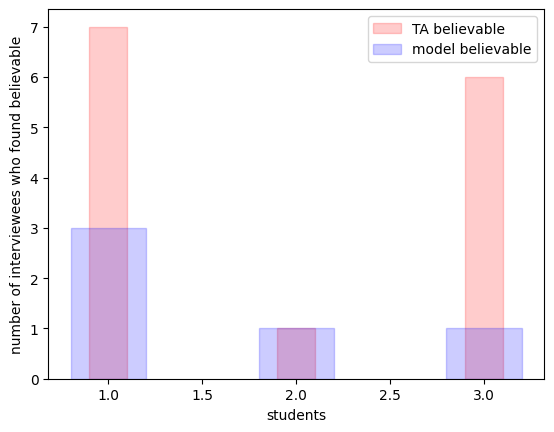

In [142]:
def TAs_vs_models_analysis(TAs_table, TAs_headers, models_table, models_headers):
    def is_believable(t):
        if isinstance(t, str):
            believable = "believable"
            return str(t[:len(believable)]).lower() == believable
        return False

    print(TAs_headers)
    print(models_headers)

    TA_trust_counter = [list(TAs_table[TAs_headers[i]]) for i in [1,5,9]] # make a counter
    TA_features_counter = [list(TAs_table[TAs_headers[i]]) for i in [-3, -2, -1]] # make a counter

    model_trust_counter = [list(models_table[models_headers[i]]) for i in [1,5,9]] # make a counter
    model_features_counter = [list(models_table[models_headers[i]]) for i in [-3, -2, -1]] # make a counter

    # believable or not 
    TA_perceptions = [list(TAs_table[TAs_headers[i]]) for i in [0,4, 8]]
    TA_believable = [[is_believable(perception) for perception in TA_perceptions[i]] for i in range(len(TA_perceptions))]
    TA_believable = [sum(TA_believable[i]) for i in range(len(TA_believable))]
    
    models_perceptions = [list(models_table[models_headers[i]]) for i in [0,4, 8]]
    model_believable = [[is_believable(perception) for perception in models_perceptions[i]] for i in range(len(models_perceptions))]
    model_believable = [sum(model_believable[i]) for i in range(len(model_believable))]

    TA_believable_rate_s1 = TA_believable[0] / n_intervieews
    model_believable_rate_s1 = model_believable[0] / n_intervieews

    x = list(range(1, len(TA_believable)+1))
    plt.bar(x, TA_believable, 0.2, color="red", alpha=0.2, label='TA believable', edgecolor='red')
    plt.bar(x, model_believable, 0.4, color="blue", alpha=0.2, label='model believable', edgecolor='blue')
    plt.xlabel("students")
    plt.ylabel("number of interviewees who found believable")
    plt.legend()
    plt.show()

    return TA_trust_counter, TA_features_counter, model_trust_counter, TA_features_counter, TA_believable_rate_s1, model_believable_rate_s1

TA_trust_counter, TA_features_counter, model_trust_counter, TA_features_counter, TA_believable_rate_s1, model_believable_rate_s1 = TAs_vs_models_analysis(responses_TAs, headers_TAs, responses_models, headers_models)

["You're a tutor for a single student, who is predicted to perform poorly. What are your most important explainability needs to get them back on the right track? [Consistent]", "You're a tutor for a single student, who is predicted to perform poorly. What are your most important explainability needs to get them back on the right track? [Real-Time ]", "You're a tutor for a single student, who is predicted to perform poorly. What are your most important explainability needs to get them back on the right track? [Accurate [model confidence in the explanation]]", "You're a tutor for a single student, who is predicted to perform poorly. What are your most important explainability needs to get them back on the right track? [Actionable [designing an intervention]]", "You're a tutor for a single student, who is predicted to perform poorly. What are your most important explainability needs to get them back on the right track? [Human Interpretable [easy for a non-data scientist to understand]]", 

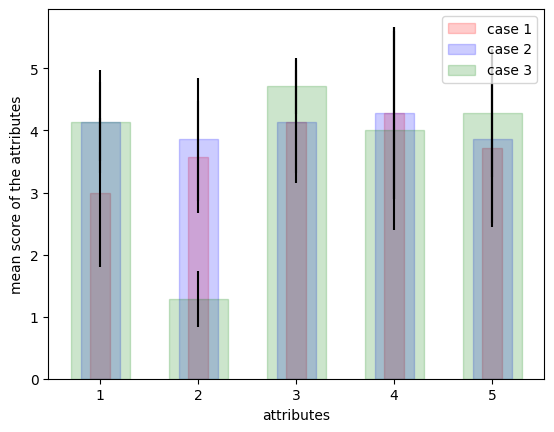

In [139]:
def xai_attributes(needs_table, needs_headers):
    print(needs_headers)
    attributes = []
    attributes_mean = []
    attributes_std = []
    
    s1 = list(range(5))
    s2 = list(range(6,11))
    s3 = list(range(12,17))
    for r in [s1,s2,s3]:
        attr = [list(needs_table[needs_headers[i]]) for i in r]
        attr = [[int(el[0]) for el in l] for l in attr]
        attr_mean = []
        attr_std = []
        for a in attr:
            attr_mean.append(np.mean(a))
            attr_std.append(np.std(a))
        attributes.append(attr)
        attributes_mean.append(attr_mean)
        attributes_std.append(attr_std)

    x = list(range(1, len(attr)+1))
    colors = ["red","blue","green"]
    for i in range(3):
        plt.bar(x, attributes_mean[i], 0.2 + i*0.2, color=colors[i], alpha=0.2, label='case '+str(i+1), edgecolor=colors[i], yerr=attributes_std[i])
    #plt.bar(x, model_believable, 0.4, color="blue", alpha=0.2, label='model believable', edgecolor='blue')
    plt.xlabel("attributes")
    plt.ylabel("mean score of the attributes")
    plt.legend()
    plt.show()

    return  attributes_mean, attributes_std

attributes_mean, attributes_std = xai_attributes(responses_explainability_needs, headers_explainability_needs)

In [140]:
print("attributes_mean:",attributes_mean)
print("attributes_std:",attributes_std) 

attributes_mean: [[3.0, 3.5714285714285716, 4.142857142857143, 4.285714285714286, 3.7142857142857144], [4.142857142857143, 3.857142857142857, 4.142857142857143, 4.285714285714286, 3.857142857142857], [4.142857142857143, 1.2857142857142858, 4.714285714285714, 4.0, 4.285714285714286]]
attributes_std: [[1.1952286093343936, 0.9035079029052513, 0.9897433186107868, 1.385051387833237, 1.2777531299998799], [0.6388765649999399, 0.9897433186107869, 0.8329931278350429, 1.385051387833237, 1.355261854357877], [0.8329931278350429, 0.45175395145262565, 0.45175395145262565, 1.6035674514745464, 1.0301575072754257]]
